# Load the CSV
We load the csv file created by the scraper in first part.


In [ ]:
from pathlib import Path

import pandas as pd
from pandas import DataFrame

from utils import get_path

tweet_path: Path = get_path("./tweets.csv")
df: DataFrame = pd.read_csv(tweet_path, parse_dates=['created_at'], date_format='%a %b %d %H:%M:%S %z %Y',
                            dtype={'id': int,
                                   'username': 'string',
                                   'text': 'string',
                                   'retweets': int,
                                   'likes': int})
df.set_index('id', inplace=True)
df.info()
df.describe()

## General infos

In [ ]:
df.head()

## Numerics

In [ ]:
most_retweeted = df.nlargest(10, "retweets")[["username", "text", "retweets"]]
most_retweeted

In [ ]:

most_liked = df.nlargest(10, "likes")[["username", "text", "likes"]]
most_liked


## Time analysis
We try to understand tweets time distribution

In [ ]:
# Extract date and hour for analysis
df["date"] = df["created_at"].dt.date
df["hour"] = df["created_at"].dt.hour
df.head()

In [ ]:
tweets_per_day = df.groupby("date")["text"].count().to_frame(name="tweets")
tweets_per_day


In [ ]:
tweets_per_hour = df.groupby("hour")["text"].count().to_frame(name="tweets")
tweets_per_hour

In [ ]:
import matplotlib.pyplot as plt

tweets_per_hour.plot(kind="bar", figsize=(10, 5), color="royalblue")
plt.xlabel("Hour of the Day")
plt.ylabel("Tweet Count")
plt.title("Tweet Frequency by Hour")
plt.show()

## Most active users

In [ ]:
active_users = df["username"].value_counts().head(10)
active_users

## Words Analysis

### Frequency

In [59]:
import re
import matplotlib.pyplot as plt
from collections import Counter
from nltk.corpus import stopwords
import nltk
# Load Italian
nltk.download('stopwords')
stopwords_it = set(stopwords.words("italian"))

# Combine all tweets into a single text
all_text = " ".join(df["text"]).lower()

# Extract words (only those longer than 6 characters & not in stopwords)
words = [
    word for word in re.findall(r'\b\w+\b', all_text)
    if len(word) > 6 and word not in stopwords_it
]

# Count word occurrences
word_freq = Counter(words).most_common(20)
word_df = pd.DataFrame(word_freq, columns=["word", "frequency"])
word_df


[nltk_data] Downloading package stopwords to /home/luca/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,word,frequency
0,sanremo2025,59
1,sanremo,12
2,frassica,7
3,damiano,7
4,italiano,7
5,secondi,4
6,malgioglio,4
7,bambino,3
8,suonare,2
9,pianoforte,2


/tmp/ipykernel_45750/3379330175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="frequency", y="word", data=word_df, palette="viridis")


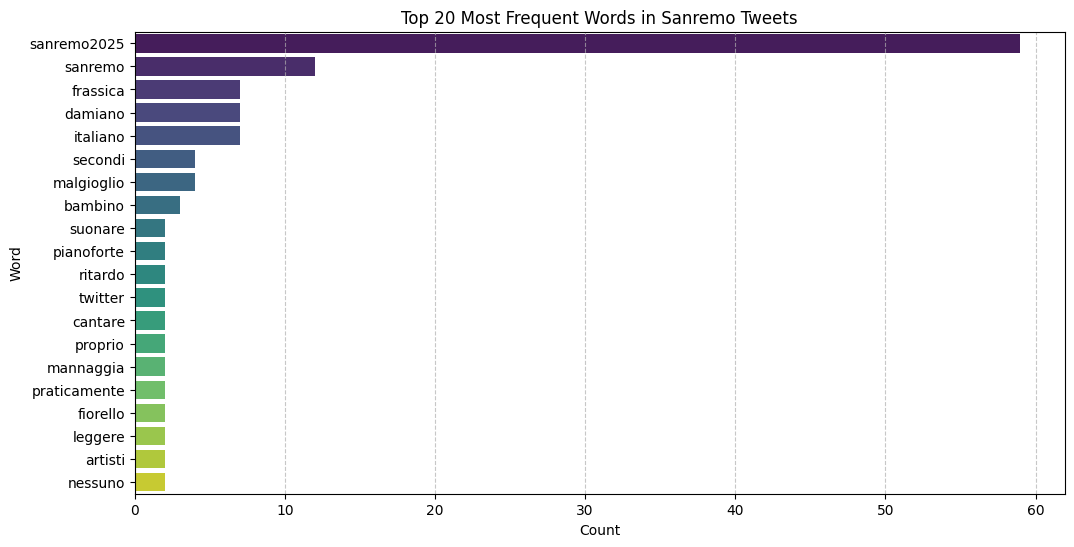

In [60]:
# Set style
import seaborn as sns
plt.figure(figsize=(12, 6))
sns.barplot(x="frequency", y="word", data=word_df, palette="viridis")

# Titles and labels
plt.xlabel("Count")
plt.ylabel("Word")
plt.title("Top 20 Most Frequent Words in Sanremo Tweets")
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Show plot
plt.show()

### Hashtags

In [ ]:
from collections import Counter
import re


# Function to clean and extract words
def extract_words(text):
    words = re.findall(r"#\w+", text.lower())  # Extract hashtags
    return words

all_hashtags = df["text"].dropna().apply(extract_words)
hashtags = Counter([ht for sublist in all_hashtags for ht in sublist])
hashtags.most_common(10)

## Sentiment Analysis

In [ ]:
from textblob import TextBlob

# Function to get sentiment polarity (-1 to 1)
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df["sentiment"] = df["text"].apply(get_sentiment)

# Average sentiment score
df["sentiment"].describe()


In [ ]:
# Tweets with most positive sentiment
df.sort_values(by="sentiment", ascending=False)[["username", "text", "sentiment"]].head(5)

In [ ]:
# Tweets with most negative sentiment
df.sort_values(by="sentiment", ascending=True)[["username", "text", "sentiment"]].head(5)